In [1]:
from typing import TypedDict, List
from langgraph.graph import StateGraph 

In [2]:
class AgentState(TypedDict):
    name: str
    values: List[int]
    operation: str
    result: str

In [3]:
import math

def apply_operation(state: AgentState) -> AgentState:
    """ 
    This function will apply the operation on the values list with the given name as placeholder
    """

    if state['operation'] == '+':
        state['result'] = f"Hi {state['name']}, your answer is: {sum(state['values'])}."
    elif state['operation'] == '*':
        product = math.prod(state['values'])
        state['result'] = f"Hi {state['name']}, your answer is: {product}."
    else:
        state['result'] = "Unsupported operation."
    
    return state

In [4]:
graph = StateGraph(AgentState)

graph.add_node("operations_node", apply_operation)

graph.set_entry_point("operations_node")
graph.set_finish_point("operations_node")

app = graph.compile()

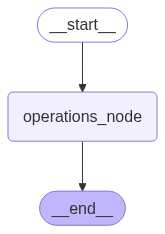

In [5]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [6]:
answers_add = app.invoke({"name": "Steve", "values": [1,2,3,4], "operation": "+"})

In [7]:
answers_add

{'name': 'Steve',
 'values': [1, 2, 3, 4],
 'operation': '+',
 'result': 'Hi Steve, your answer is: 10.'}

In [8]:
answers_mul = app.invoke({"name": "Steve", "values": [1,2,3,4], "operation": "*"})

In [9]:
answers_mul

{'name': 'Steve',
 'values': [1, 2, 3, 4],
 'operation': '*',
 'result': 'Hi Steve, your answer is: 24.'}

In [10]:
answers_error = app.invoke({"name": "Steve", "values": [1,2,3,4], "operation": "-"})

In [11]:
answers_error

{'name': 'Steve',
 'values': [1, 2, 3, 4],
 'operation': '-',
 'result': 'Unsupported operation.'}